In [1]:
import os, glob, numpy as np, matplotlib.pyplot as plt, pandas as pd 
from collections import defaultdict 
from matplotlib.pyplot import figure 

In [2]:
LOG_DIRS = ["../debug_logs/env-search-2/"] 

INITIAL_CUT = 0   
CUT = 30_000 
SMOOTH = 250 

In [3]:
def running_mean(X, N=SMOOTH):
    cumsum = np.cumsum(np.insert(X, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
Exps
 set()


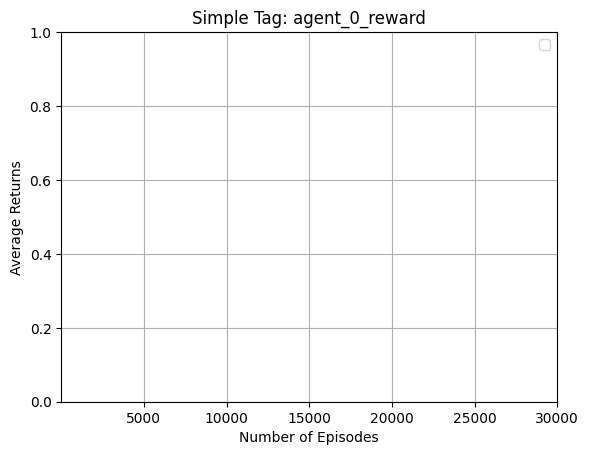

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
Exps
 set()


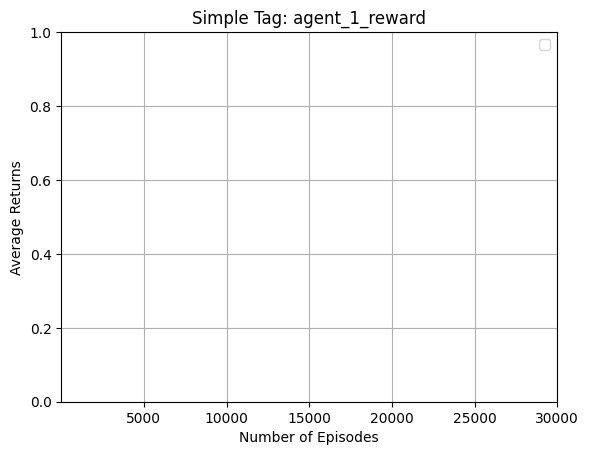

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[]
Exps
 set()


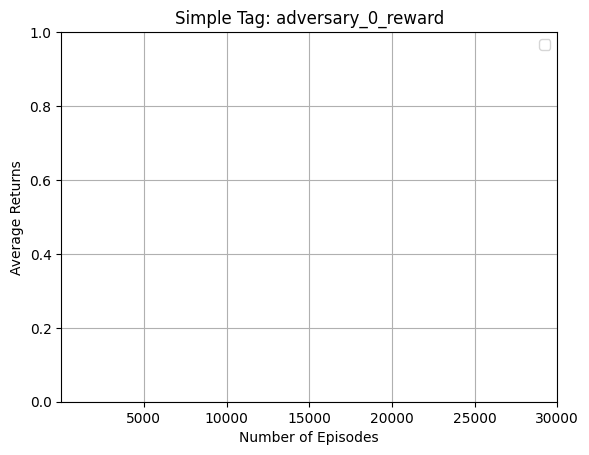

In [4]:
def plots(name="self_reward", condition="num_obstacles_1"): 
    logs = [] 
    [logs.extend(glob.glob(os.path.join(log_dir, "*/**/"+name+".npy"), recursive=True)) for log_dir in LOG_DIRS] 
    print(logs) 

    exps = set() 
    [exps.add("--".join(l.split("/")[-3].split("--")[:-1])) for l in logs] 
    print("Exps\n", exps) 

    seeds = ["seed_" + str(s)+"/" for s in list(range(0,4))]
    
    vals = [] 
    for e in exps: 
        vals = [] 
        if condition in e: 
            print("exp:", e) 
            for l in logs: 
                if (e in l) and any([s in l for s in seeds]): 
                    # print(l)
                    x = np.load(l) 
                    if (x.shape[0]>=CUT): 
                        vals.append(x[INITIAL_CUT:CUT]) 
            vals = np.array(vals)
            r_mean = np.mean(vals, axis=0)
            r_std = np.std(vals, axis=0)/np.sqrt(20) 
            x = np.arange(len(r_mean))+1 
            plt.plot(running_mean(x), running_mean(r_mean), label=e) 
            plt.fill_between(running_mean(x), running_mean(r_mean+r_std), running_mean(r_mean-r_std), alpha=0.1) 
    plt.title("Simple Tag: " + name) 
    plt.xlabel("Number of Episodes")
    plt.ylabel("Average Returns")
    plt.xlim((10, CUT)) 
    # plt.ylim((-34, -18)) 
    plt.grid()
    plt.legend() 
    plt.show() 
    plt.close() 

for name in ["agent_0_reward", "agent_1_reward", "adversary_0_reward"]: 
    plots(name=name, condition="simple_tag_v2") 